In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Tidying and Cleaning Lab
## Reading, tidying and cleaning data. Preparing data for exploration, mining, analysis and learning

In this lab, you'll be working with the Coffee Quality Index dataset, located [here](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi). For convenience (and to save trouble in case you can't download files, or someone uploads a newer version), I've provided the dataset in the `data/` folder. The metadata (description) is at the Kaggle link. For this lab, you'll only need `merged_data_cleaned.csv`, as it is the concatenation of the other two datasets.

In this (and the following labs), you'll get several questions and problems. Do your analysis, describe it, use any tools and plots you wish, and answer. You can create any amount of cells you'd like.

Sometimes, the answers will not be unique, and they will depend on how you decide to approach and solve the problem. This is usual - we're doing science after all!

It's a good idea to save your clean dataset after all the work you've done to it.

### Problem 1. Read the dataset (1 point)
This should be self-explanatory. The first column is the index.

In [2]:
data = pd.read_csv('data/merged_data_cleaned.csv')

### Problem 2. Observations and features (1 point)
How many observations are there? How many features? Which features are numerical, and which are categorical?

**Note:** Think about the _meaning_, not the data types. The dataset hasn't been thoroughly cleaned.

In [3]:
data.shape

(1339, 44)

In [4]:
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 1339
Number of columns: 44


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1180 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

In [6]:
print("*** Numeral columns")
print(f"Total: {len(data.select_dtypes(include=['number']).columns)}")
print(data.select_dtypes(include='number').columns)
print()
print("*** Categorical columns")
print(f"Total: {len(data.select_dtypes(include=['object', 'category']).columns)}")
print(data.select_dtypes(include=['object', 'category']).columns)

*** Numeral columns
Total: 20
Index(['Unnamed: 0', 'Number.of.Bags', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
       'Quakers', 'Category.Two.Defects', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

*** Categorical columns
Total: 24
Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Bag.Weight', 'In.Country.Partner', 'Harvest.Year', 'Grading.Date',
       'Owner.1', 'Variety', 'Processing.Method', 'Color', 'Expiration',
       'Certification.Body', 'Certification.Address', 'Certification.Contact',
       'unit_of_measurement'],
      dtype='object')


### Problem 3. Column manipulation (1 point)
Make the column names more Pythonic (which helps with the quality and... aesthetics). Convert column names to `snake_case`, i.e. `species`, `country_of_origin`, `ico_number`, etc. Try to not do it manually.

In [7]:
data.columns = data.columns.str.lower() # lowercase
data.columns = data.columns.str.replace(".", "_") # replace the "." with "_"
print(f"Columns converted into pythonic text:\n {data.columns}")

Columns converted into pythonic text:
 Index(['unnamed: 0', 'species', 'owner', 'country_of_origin', 'farm_name',
       'lot_number', 'mill', 'ico_number', 'company', 'altitude', 'region',
       'producer', 'number_of_bags', 'bag_weight', 'in_country_partner',
       'harvest_year', 'grading_date', 'owner_1', 'variety',
       'processing_method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean_cup', 'sweetness', 'cupper_points',
       'total_cup_points', 'moisture', 'category_one_defects', 'quakers',
       'color', 'category_two_defects', 'expiration', 'certification_body',
       'certification_address', 'certification_contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')


### Problem 4. Bag weight (1 point)
What's up with the bag weights? Make all necessary changes to the column values. Don't forget to document your methods and assumptions.

convert the cells into numerical values

In [8]:
data["bag_weight"].unique()

array(['60 kg', '1', '30 kg', '69 kg', '1 kg', '2 kg,lbs', '6', '3 lbs',
       '50 kg', '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg',
       '19200 kg', '5 lbs', '1 kg,lbs', '6 kg', '0 lbs', '46 kg', '40 kg',
       '20 kg', '34 kg', '1 lbs', '660 kg', '18975 kg', '12000 kg',
       '35 kg', '66 kg', '80 kg', '132 lbs', '5 kg', '25 kg', '59 kg',
       '18000 kg', '150 lbs', '9000 kg', '18 kg', '10 kg', '29 kg',
       '1218 kg', '4 lbs', '0 kg', '13800 kg', '1500 kg', '24 kg',
       '80 lbs', '8 kg', '3 kg', '350 kg', '67 kg', '4 kg', '55 lbs',
       '100 kg', '130 lbs'], dtype=object)

In [9]:
def remove_text(text):
    numerical = int(text.replace("kg", "").replace("lbs", "").replace("1 kg,lbs", "").replace(" ,", "").strip())
    return numerical

data["bag_weight"] = data["bag_weight"].apply(remove_text)

In [10]:
data["bag_weight"].unique()

array([   60,     1,    30,    69,     2,     6,     3,    50,   100,
          15,    70, 19200,     5,     0,    46,    40,    20,    34,
         660, 18975, 12000,    35,    66,    80,   132,    25,    59,
       18000,   150,  9000,    18,    10,    29,  1218,     4, 13800,
        1500,    24,     8,   350,    67,    55,   130], dtype=int64)

### Problem 5. Dates (1 point)
This should remind you of problem 4 but it's slightly nastier. Fix the harvest years, document the process.

While you're here, fix the expiration dates, and grading dates. Unlike the other column, these should be dates (`pd.to_datetime()` is your friend).

In [11]:
data["harvest_year"].unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 - April 2010', 'May-August', '2009/2010', '2015',
       '2011', '2016', '2015/2016', '2010', 'Fall 2009', '2017',
       '2009 / 2010', '2010-2011', '2009-2010', '2009 - 2010',
       '2013/2014', '2017 / 2018', 'mmm', 'TEST',
       'December 2009-March 2010', '2014/2015', '2011/2012',
       'January 2011', '4T/10', '2016 / 2017', '23 July 2010',
       'January Through April', '1T/2011', '4t/2010', '4T/2010',
       'August to December', 'Mayo a Julio', '47/2010', 'Abril - Julio',
       '4t/2011', 'Abril - Julio /2011', 'Spring 2011 in Colombia.',
       '3T/2011', '2016/2017', '1t/2011', '2018', '4T72010', '08/09 crop'],
      dtype=object)

In [12]:
def clean_harvest_year(year):
    if isinstance(year, float) and np.isnan(year):
        return np.nan
    if isinstance(year, str):
        if 'May-August' in year or '08/09 crop' in year or 'mmm' in year or 'TEST' in year or 'Mayo a Julio' in year or 'Abril - Julio' in year or 'January Through April' in year or 'August to December' in year: 
            return np.nan
        elif " in Colombia" in year:
            return year.replace(" in Colombia", "")
        elif year == "10":
            return "2010"
    return year.replace(" / ", "/").replace("-", "/").replace("4T/", "").replace("1T/", "").replace("47/", "").replace("1T/", "").replace("4T7", "").replace("3T/", "").replace("1t/", "").replace("4t/", "")
data["harvest_year"] = data["harvest_year"].apply(clean_harvest_year)
data["harvest_year"].unique()

array(['2014', nan, '2013', '2012', 'March 2010',
       'Sept 2009 / April 2010', '2009/2010', '2015', '2011', '2016',
       '2015/2016', '2010', 'Fall 2009', '2017', '2010/2011',
       '2009 / 2010', '2013/2014', '2017/2018',
       'December 2009/March 2010', '2014/2015', '2011/2012',
       'January 2011', '10', '2016/2017', '23 July 2010', 'Spring 2011.',
       '2018'], dtype=object)

In [13]:
data["expiration"].unique()

array(['April 3rd, 2016', 'May 31st, 2011', 'March 25th, 2016',
       'September 3rd, 2014', 'September 17th, 2013',
       'September 2nd, 2011', 'March 29th, 2016', 'March 26th, 2016',
       'March 12th, 2016', 'August 31st, 2011', 'June 16th, 2011',
       'April 7th, 2017', 'March 24th, 2016', 'April 2nd, 2015',
       'July 26th, 2013', 'December 2nd, 2012', 'June 26th, 2015',
       'May 18th, 2018', 'May 18th, 2017', 'May 18th, 2011',
       'December 2nd, 2016', 'May 30th, 2015', 'April 6th, 2013',
       'January 28th, 2012', 'June 17th, 2011', 'April 12th, 2013',
       'January 4th, 2012', 'June 9th, 2016', 'January 29th, 2016',
       'October 1st, 2015', 'March 20th, 2015', 'February 6th, 2015',
       'February 12th, 2013', 'May 16th, 2017', 'June 30th, 2015',
       'July 26th, 2014', 'October 9th, 2018', 'July 3rd, 2013',
       'June 5th, 2013', 'June 23rd, 2018', 'January 22nd, 2015',
       'October 25th, 2013', 'March 18th, 2014', 'January 12th, 2014',
       'May

In [14]:
def clearing_dates(date):
    return date.replace("rd", "").replace("th", "").replace("st", "").replace("nd", "").replace("Augu", "August").strip()

data["expiration"] = data["expiration"].apply(clearing_dates)
data["expiration"].unique()

array(['April 3, 2016', 'May 31, 2011', 'March 25, 2016',
       'September 3, 2014', 'September 17, 2013', 'September 2, 2011',
       'March 29, 2016', 'March 26, 2016', 'March 12, 2016',
       'August 31, 2011', 'June 16, 2011', 'April 7, 2017',
       'March 24, 2016', 'April 2, 2015', 'July 26, 2013',
       'December 2, 2012', 'June 26, 2015', 'May 18, 2018',
       'May 18, 2017', 'May 18, 2011', 'December 2, 2016', 'May 30, 2015',
       'April 6, 2013', 'January 28, 2012', 'June 17, 2011',
       'April 12, 2013', 'January 4, 2012', 'June 9, 2016',
       'January 29, 2016', 'October 1, 2015', 'March 20, 2015',
       'February 6, 2015', 'February 12, 2013', 'May 16, 2017',
       'June 30, 2015', 'July 26, 2014', 'October 9, 2018',
       'July 3, 2013', 'June 5, 2013', 'June 23, 2018',
       'January 22, 2015', 'October 25, 2013', 'March 18, 2014',
       'January 12, 2014', 'May 22, 2016', 'March 30, 2016',
       'February 26, 2014', 'April 6, 2017', 'May 1, 2015',
     

In [15]:
data["expiration"] = pd.to_datetime(data["expiration"])
data["expiration"].unique()

<DatetimeArray>
['2016-04-03 00:00:00', '2011-05-31 00:00:00', '2016-03-25 00:00:00',
 '2014-09-03 00:00:00', '2013-09-17 00:00:00', '2011-09-02 00:00:00',
 '2016-03-29 00:00:00', '2016-03-26 00:00:00', '2016-03-12 00:00:00',
 '2011-08-31 00:00:00',
 ...
 '2013-01-04 00:00:00', '2018-10-31 00:00:00', '2015-07-14 00:00:00',
 '2018-10-25 00:00:00', '2017-08-17 00:00:00', '2015-08-05 00:00:00',
 '2017-08-23 00:00:00', '2015-05-19 00:00:00', '2014-06-20 00:00:00',
 '2015-12-23 00:00:00']
Length: 565, dtype: datetime64[ns]

In [16]:
data["grading_date"].unique()

array(['April 4th, 2015', 'May 31st, 2010', 'March 26th, 2015',
       'September 3rd, 2013', 'September 17th, 2012',
       'September 2nd, 2010', 'March 30th, 2015', 'March 27th, 2015',
       'March 13th, 2015', 'August 31st, 2010', 'June 16th, 2010',
       'April 7th, 2016', 'March 25th, 2015', 'April 2nd, 2014',
       'July 26th, 2012', 'December 3rd, 2011', 'June 26th, 2014',
       'May 18th, 2017', 'May 18th, 2016', 'May 18th, 2010',
       'December 3rd, 2015', 'May 30th, 2014', 'April 6th, 2012',
       'January 28th, 2011', 'June 17th, 2010', 'April 12th, 2012',
       'January 4th, 2011', 'June 10th, 2015', 'January 29th, 2015',
       'October 1st, 2014', 'March 20th, 2014', 'February 6th, 2014',
       'February 13th, 2012', 'May 16th, 2016', 'June 30th, 2014',
       'July 26th, 2013', 'October 9th, 2017', 'July 3rd, 2012',
       'June 5th, 2012', 'June 23rd, 2017', 'January 22nd, 2014',
       'October 25th, 2012', 'March 18th, 2013', 'January 12th, 2013',
       'Ma

In [17]:
data["grading_date"] = data["grading_date"].apply(clearing_dates)
data["grading_date"] = pd.to_datetime(data["grading_date"])
data["grading_date"].unique()

<DatetimeArray>
['2015-04-04 00:00:00', '2010-05-31 00:00:00', '2015-03-26 00:00:00',
 '2013-09-03 00:00:00', '2012-09-17 00:00:00', '2010-09-02 00:00:00',
 '2015-03-30 00:00:00', '2015-03-27 00:00:00', '2015-03-13 00:00:00',
 '2010-08-31 00:00:00',
 ...
 '2012-01-05 00:00:00', '2017-10-31 00:00:00', '2014-07-14 00:00:00',
 '2017-10-25 00:00:00', '2016-08-17 00:00:00', '2014-08-05 00:00:00',
 '2016-08-23 00:00:00', '2014-05-19 00:00:00', '2013-06-20 00:00:00',
 '2014-12-23 00:00:00']
Length: 565, dtype: datetime64[ns]

### Problem 6. Countries (1 point)
How many coffees are there with unknown countries of origin? What can you do about them?

In [18]:
data["country_of_origin"].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', nan, 'India'], dtype=object)

In [19]:
data["country_of_origin"].isna().sum()

1

In [20]:
data.dropna(subset=["country_of_origin"], inplace=True)

In [21]:
data["country_of_origin"].isna().sum()

0

In [22]:
data["country_of_origin"].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', 'India'], dtype=object)

### Problem 7. Owners (1 point)
There are two suspicious columns, named `Owner`, and `Owner.1` (they're likely called something different after you solved problem 3). Do something about them. Is there any link to `Producer`?

it seems that the column "owner" is the same as the column "owner_1" so we can drop the column "owner" and rename the column "owner_1" to "owner". regarding its relation to "Producer" there are sum observations that matches, but not all of them. So we can keep it.

In [23]:
data["owner"].unique()

array(['metad plc', 'grounds for health admin', 'yidnekachew dabessa',
       'ji-ae ahn', 'hugo valdivia', 'ethiopia commodity exchange',
       'diamond enterprise plc', 'mohammed lalo',
       'cqi q coffee sample representative', 'yunnan coffee exchange',
       'essencecoffee', 'the coffee source inc.', 'roberto licona franco',
       'nucoffee', 'kabum trading company', 'bismarck castro',
       'lin, che-hao krude 林哲豪', 'nora zeas', 'specialty coffee-korea',
       'francisco a mena', 'hider abamecha', 'daniel magu',
       'kona pacific farmers cooperative', 'itdp international',
       'jacques pereira carneiro', 'jungle estate',
       'great lakes coffee uganda', 'lusso lab', 'afca',
       'juan luis alvarado romero', 'kawacom uganda ltd',
       'exportadora de cafe condor s.a', 'gonzalo hernandez',
       'ibrahim hussien speciality coffee producer &export',
       'seid damtew coffee planataion', 'dane loraas',
       'colbran coffeelands, ltd.', 'atlantic specialty coff

In [24]:
data["owner_1"].unique()

array(['metad plc', 'Grounds for Health Admin', 'Yidnekachew Dabessa',
       'Ji-Ae Ahn', 'Hugo Valdivia', 'Ethiopia Commodity Exchange',
       'Diamond Enterprise Plc', 'Mohammed Lalo',
       'CQI Q Coffee Sample Representative', 'Yunnan Coffee Exchange',
       'EssenceCoffee', 'The Coffee Source Inc.', 'ROBERTO LICONA FRANCO',
       'NUCOFFEE', 'Kabum Trading company', 'Bismarck Castro',
       'Lin, Che-Hao Krude 林哲豪', 'Nora Zeas', 'Specialty Coffee-Korea',
       'Francisco A Mena', 'Hider Abamecha', 'Daniel Magu',
       'Kona Pacific Farmers Cooperative', 'ITDP International',
       'Jacques Pereira Carneiro', 'Jungle Estate',
       'Great Lakes Coffee Uganda', 'LUSSO LAB', 'AFCA',
       'Juan Luis Alvarado Romero', 'Kawacom Uganda LTD',
       'Exportadora de Cafe Condor S.A', 'Gonzalo Hernandez',
       'Ibrahim Hussien Speciality Coffee Producer &Export',
       'SEID DAMTEW COFFEE PLANATAION', 'Dane Loraas',
       'Colbran Coffeelands, Ltd.', 'Atlantic Specialty Coff

In [25]:
data[["producer", "owner", "owner_1"]]

,producer,owner,owner_1
0,METAD PLC,metad plc,metad plc
1,METAD PLC,metad plc,metad plc
2,NaN,grounds for health admin,Grounds for Health Admin
3,Yidnekachew Dabessa Coffee Plantation,yidnekachew dabessa,Yidnekachew Dabessa
4,METAD PLC,metad plc,metad plc
...,...,...,...
1334,Café Robusta del Ecuador S.A.,luis robles,Luis Robles
1335,Café Robusta del Ecuador S.A.,luis robles,Luis Robles
1336,Cafe Cazengo,james moore,James Moore
1337,NaN,cafe politico,Cafe Politico


In [26]:
data.drop(columns=["owner"], inplace=True)

In [27]:
data.rename(columns={"owner_1": "owner"}, inplace=True)

In [28]:
data[["producer", "owner"]]

,producer,owner
0,METAD PLC,metad plc
1,METAD PLC,metad plc
2,NaN,Grounds for Health Admin
3,Yidnekachew Dabessa Coffee Plantation,Yidnekachew Dabessa
4,METAD PLC,metad plc
...,...,...
1334,Café Robusta del Ecuador S.A.,Luis Robles
1335,Café Robusta del Ecuador S.A.,Luis Robles
1336,Cafe Cazengo,James Moore
1337,NaN,Cafe Politico


### Problem 8. Coffee color by country and continent (1 point)
Create a table which shows how many coffees of each color are there in every country. Leave the missing values as they are.

**Note:** If you ask me, countries should be in rows, I prefer long tables much better than wide ones.

Now do the same for continents. You know what continent each country is located in.

In [29]:
country_coffee_color = data.pivot_table(index="country_of_origin", columns="color", aggfunc="size")
country_coffee_color

color,Blue-Green,Bluish-Green,Green
country_of_origin,,,
Brazil,14.0,12.0,92.0
Burundi,NaN,NaN,1.0
China,NaN,NaN,16.0
Colombia,8.0,8.0,118.0
Costa Rica,10.0,9.0,28.0
Cote d?Ivoire,NaN,1.0,NaN
Ecuador,2.0,1.0,NaN
El Salvador,2.0,2.0,9.0
Ethiopia,NaN,2.0,15.0


In [30]:
data

,unnamed: 0,species,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,region,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,2011-05-31,Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,2016-03-25,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,2016-04-03,METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",...,Blue-Green,1,2017-01-18,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",...,Blue-Green,0,2017-01-18,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,"kwanza norte province, angola",...,NaN,6,2015-12-23,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,NaN,...,Green,1,2015-08-25,Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


### Problem 9. Ratings (1 point)
The columns `Aroma`, `Flavor`, etc., up to `Moisture` represent subjective ratings. Explore them. Show the means and range; draw histograms and / or boxplots as needed. You can even try correlations if you want. What's up with all those ratings?

In [36]:
data[["aroma", "flavor", "aftertaste", "acidity", "body", "balance", "uniformity", "clean_cup", "sweetness", "cupper_points", "moisture"]].describe().T

,count,mean,std,min,25%,50%,75%,max
aroma,1338.0,7.567317,0.377040,0.0,7.42,7.58,7.75,8.75
flavor,1338.0,7.521001,0.398033,0.0,7.33,7.58,7.75,8.83
aftertaste,1338.0,7.401816,0.403723,0.0,7.25,7.42,7.58,8.67
acidity,1338.0,7.536233,0.379478,0.0,7.33,7.58,7.75,8.75
body,1338.0,7.517451,0.370198,0.0,7.33,7.50,7.67,8.58
balance,1338.0,7.518027,0.409096,0.0,7.33,7.50,7.75,8.75
uniformity,1338.0,9.834753,0.554780,0.0,10.00,10.00,10.00,10.00
clean_cup,1338.0,9.834985,0.764218,0.0,10.00,10.00,10.00,10.00
sweetness,1338.0,9.856584,0.616320,0.0,10.00,10.00,10.00,10.00
cupper_points,1338.0,7.503565,0.473591,0.0,7.25,7.50,7.75,10.00


array([[<Axes: title={'center': 'aroma'}>,
        <Axes: title={'center': 'flavor'}>,
        <Axes: title={'center': 'aftertaste'}>],
       [<Axes: title={'center': 'acidity'}>,
        <Axes: title={'center': 'body'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'uniformity'}>,
        <Axes: title={'center': 'clean_cup'}>,
        <Axes: title={'center': 'sweetness'}>],
       [<Axes: title={'center': 'cupper_points'}>,
        <Axes: title={'center': 'moisture'}>, <Axes: >]], dtype=object)

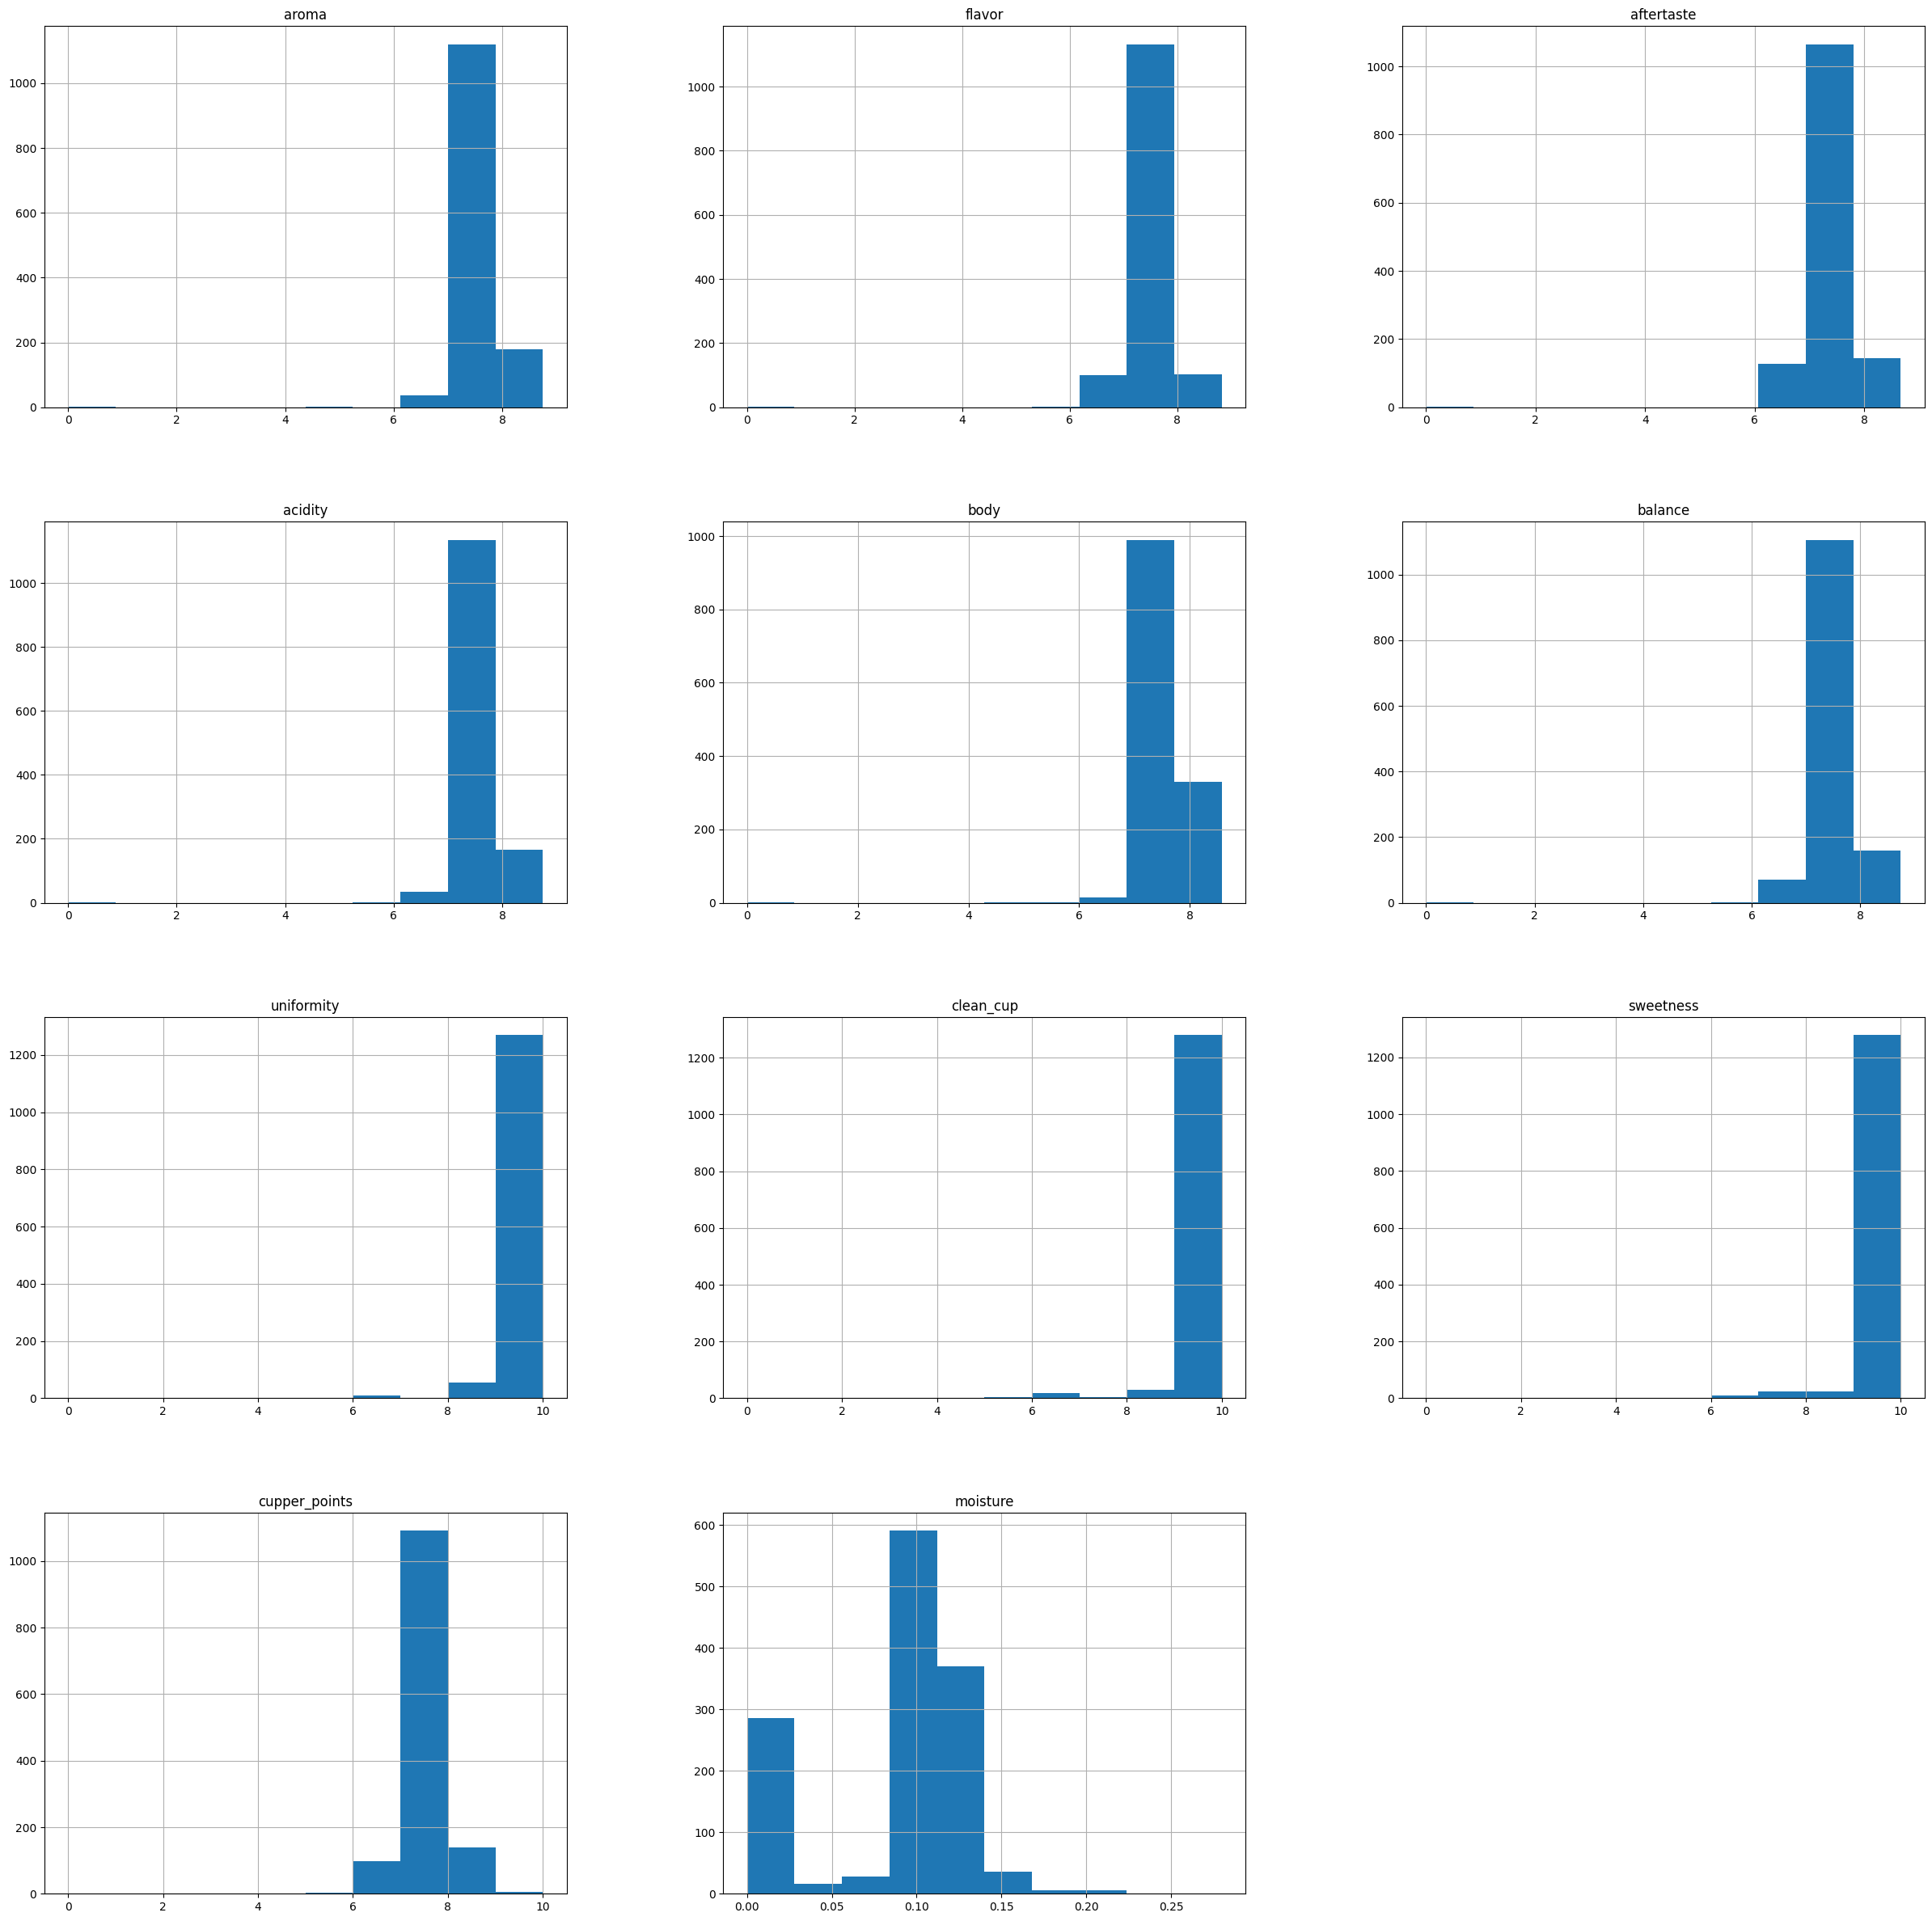

In [40]:
data[["aroma", "flavor", "aftertaste", "acidity", "body", "balance", "uniformity", "clean_cup", "sweetness", "cupper_points", "moisture"]].hist(figsize=(30, 30))

### Problem 10. High-level errors (1 point)
Check the countries against region names, altitudes, and companies. Are there any discrepancies (e.g. human errors, like a region not matching the country)? Take a look at the (cleaned) altitudes; there has been a lot of preprocessing done to them. Was it done correctly?

In [58]:
data["region"].unique()

array(['guji-hambela', nan, 'oromia', 'oromiya',
       'snnp/kaffa zone,gimbowereda', 'antioquia', 'kona', 'sulawesi',
       'yirgacheffe', 'yunnan', 'gedio', 'san ramon', 'xalapa', 'sidamo',
       'south of minas', 'kapchorwa eastern', 'comayagua',
       'leye, alishan township, chiayi county', 'vale da grama',
       'west and central valley', 'muranga', 'chiang rai',
       'sul de minas - carmo de minas', 'natou county', 'nyeri',
       'eastern uganda', 'tolima', 'kiambu', 'sipi, mt elgon',
       'nuevo oriente', 'eastern', 'huila', 'boquete', 'acatenango',
       'addis ababa', 'cajamarca', 'eastern highlands province',
       'apaneca', 'ataco, apaneca - ilamatepec mountain range',
       'kirinyaga', 'bulambuli eastern region', 'huehuetenango',
       'kapchorwa', 'west valley', 'central kenya', 'oriente',
       'santander', 'lintong',
       'kefa zone, gimbo distict, at a place called woka araba, south west ethiopia.',
       'pasto', 'aricha', 'cundinamarca', 'tarrazu'

In [59]:
data["country_of_origin"].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d?Ivoire', 'India'], dtype=object)

In [49]:
data[["country_of_origin", "region"]].pivot_table(index="country_of_origin", columns="region", aggfunc="size")

region,52 narino (exact location: mattituy; municipal region: florida code 381,acatenango,aceh,aceh gayo,aceh tengah,ada okinawa japan,addis ababa,adolfo lopez mateos,"aldea xeucalvitz, ixil region, quiche department",alta paulista (sao paulo),...,台中和平區,台中新社,"台南市東山區 (dongshan dist., tainan city)","台南市東山區( dongshan dist., tainan city)",台東太麻里,台灣,嘉義阿里山,國姓鄉 guoshing township,苗栗三灣,苗栗泰安
country_of_origin,,,,,,,,,,,,,,,,,,,,,
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Burundi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Colombia,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Costa Rica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cote d?Ivoire,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
El Salvador,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ethiopia,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### * Problem 11. Clean and explore at will
The dataset claimed to be clean, but we were able to discover a lot of things to fix and do better.

Play around with the data as much as you wish, and if you find variables to tidy up and clean - by all means, do that!